In [ ]:
#Librerias a cargar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se cargan los datos en un dataframe
df = pd.read_csv('/data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print(df.shape)
df.describe()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


El dataframe está compuesto por 299 filas y 13 columnas. Todas son de tipo numérico, algunas binarias. Todas las columnas tienen los datos completos.

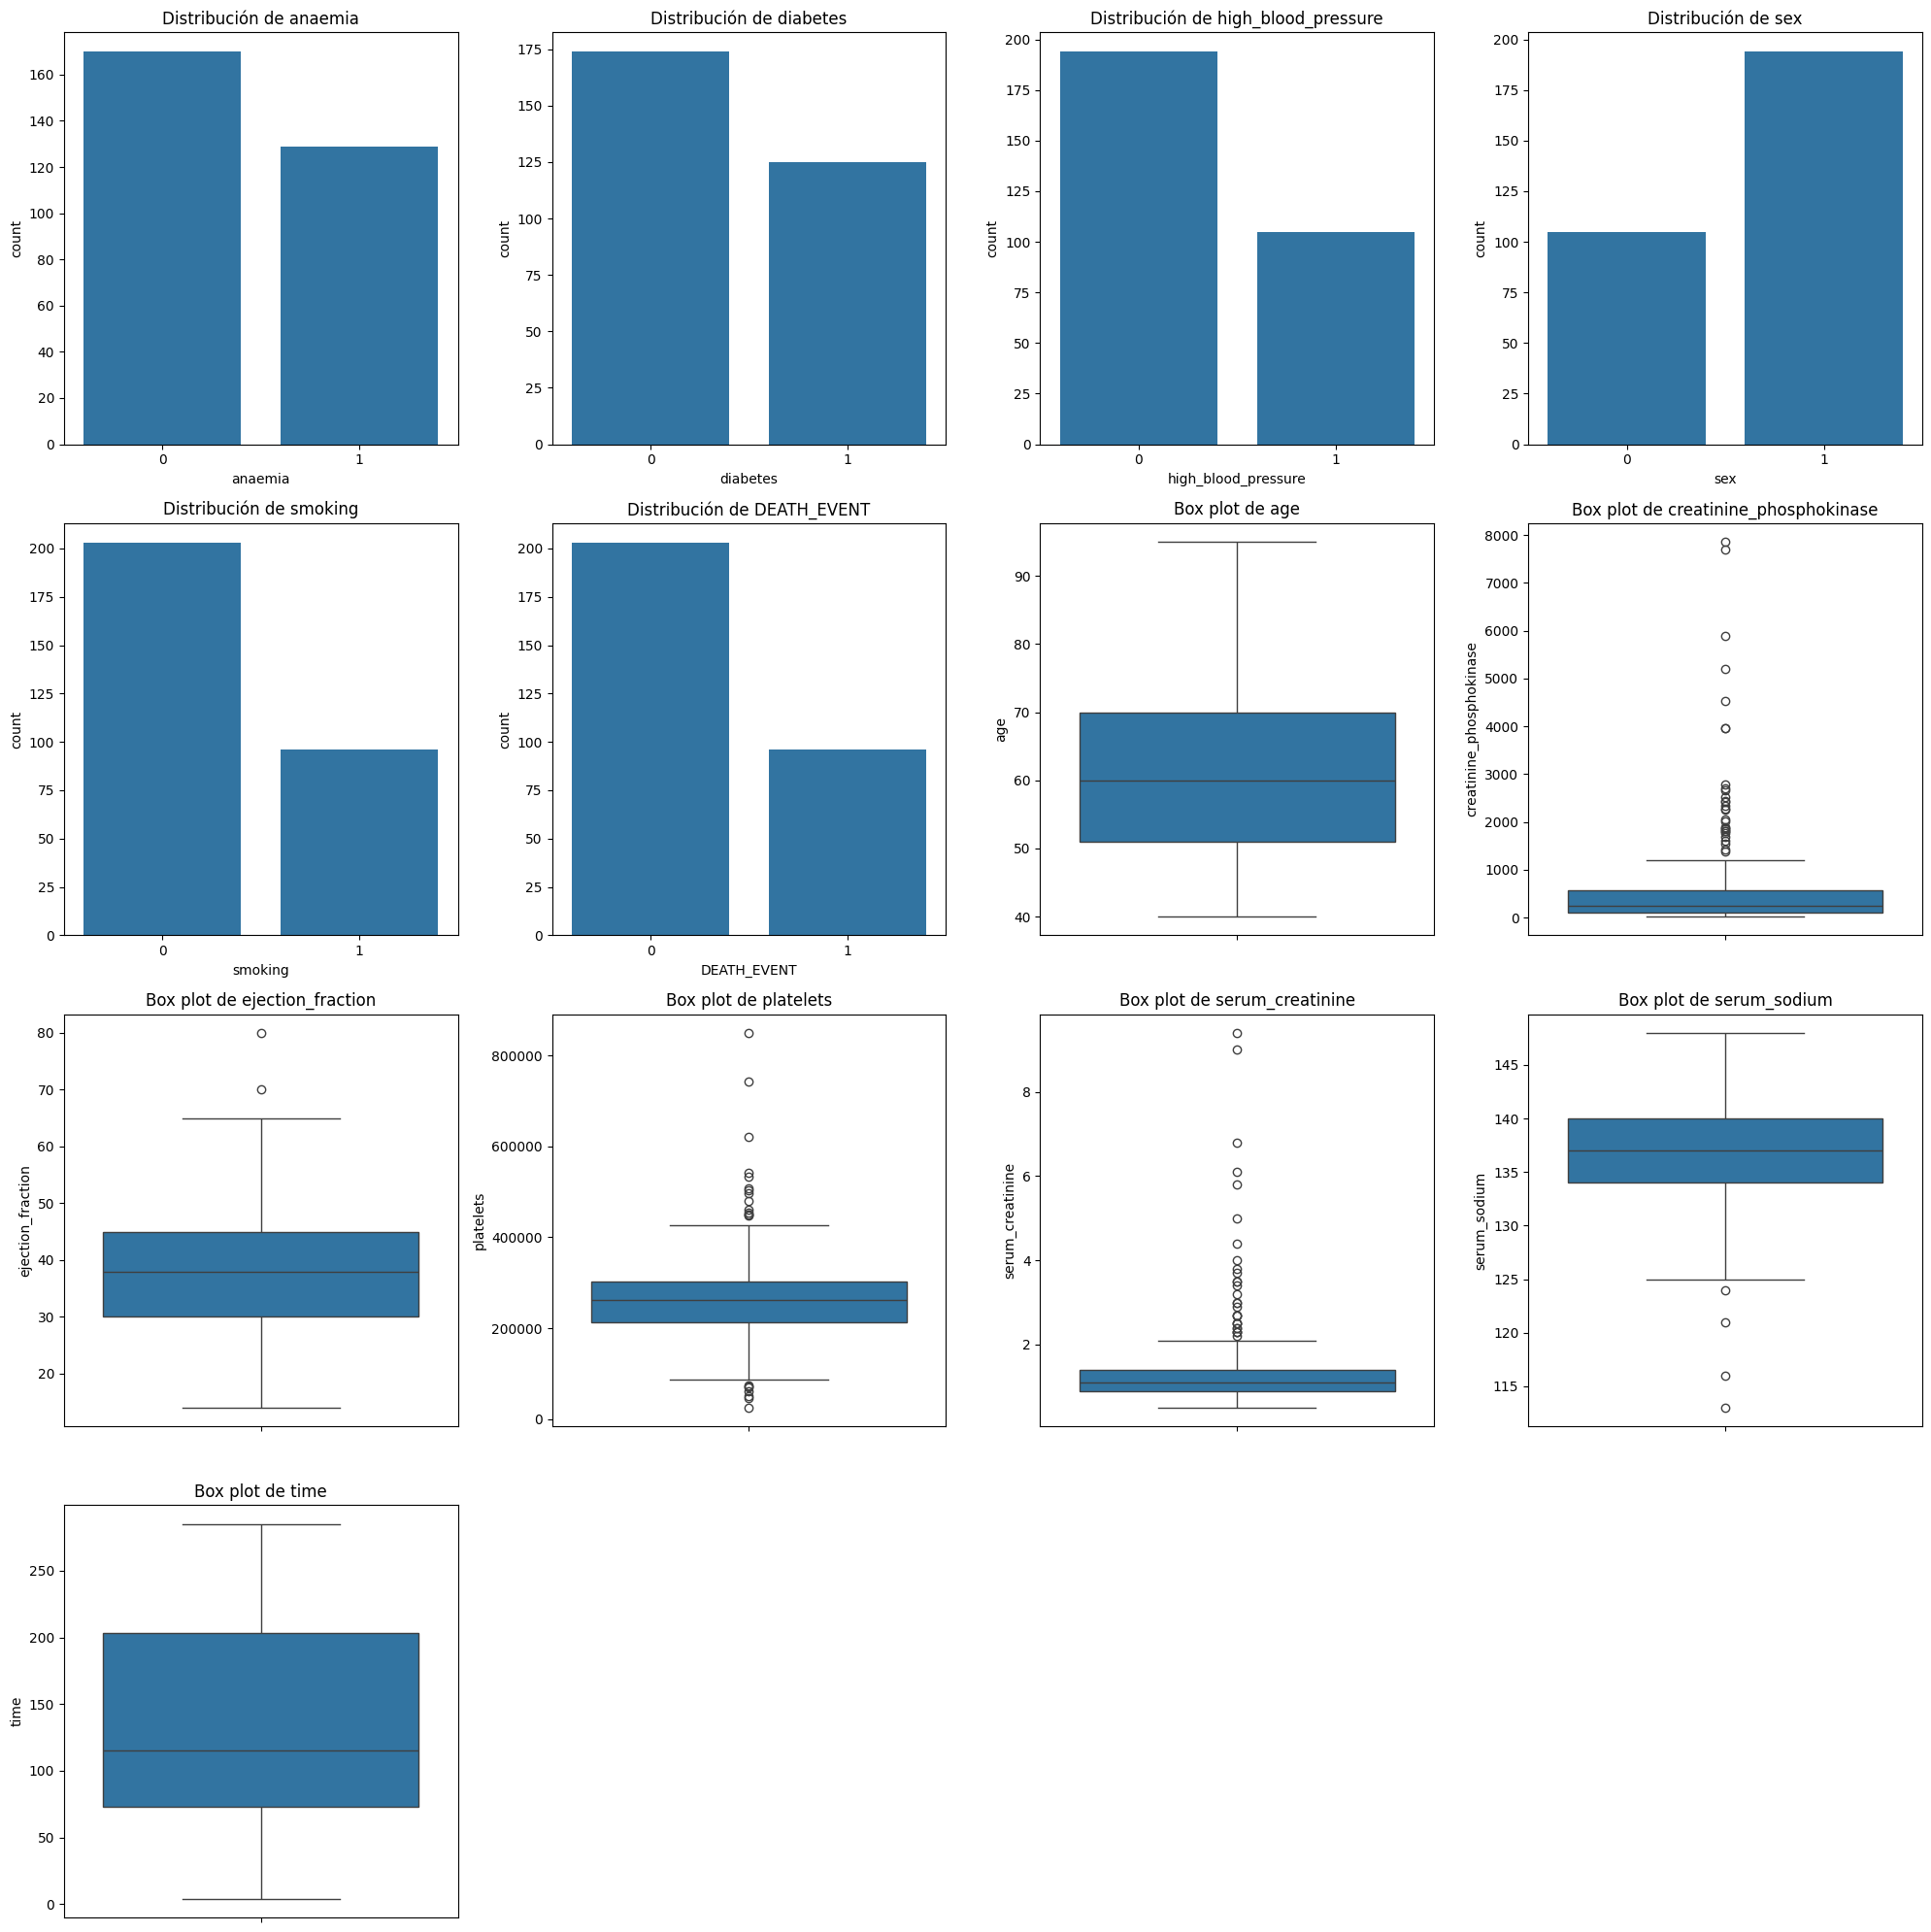

In [ ]:
# Gráficas de las variables
# Se identifican las columnas binarias para graficar en barras
binary_cols = [col for col in df.columns if set(df[col].unique()) == {0, 1}]
# Las otras columnas se grafican con un box plot
other_cols = [col for col in df.columns if col not in binary_cols]
# Nùmero de filas del gráfico
num_rows = int(np.ceil((len(binary_cols) + len(other_cols)) / 4))
plt.figure(figsize=(20, 5 * num_rows))
# Gráfico para columnas binarias
for i, col in enumerate(binary_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
# Gráfico para las otras columnas
for i, col in enumerate(other_cols):
    plt.subplot(num_rows, 4, i + 1 + len(binary_cols))
    sns.boxplot(y=col, data=df)
    plt.title(f'Box plot de {col}')
plt.tight_layout()
plt.show()

1.   Cerca de las 2/5 partes de la muestra tuvo o anemía, diabetes o presión alta
2.   La 1/3 parte son mujeres
3.   2/3 partes no fuman
4.   1/3 murió en el periodo de seguimiento
5.   El rango de edad está entre 40 y 95 años
6.   El rango del periodo de seguimiento està entre 0 y 285 días



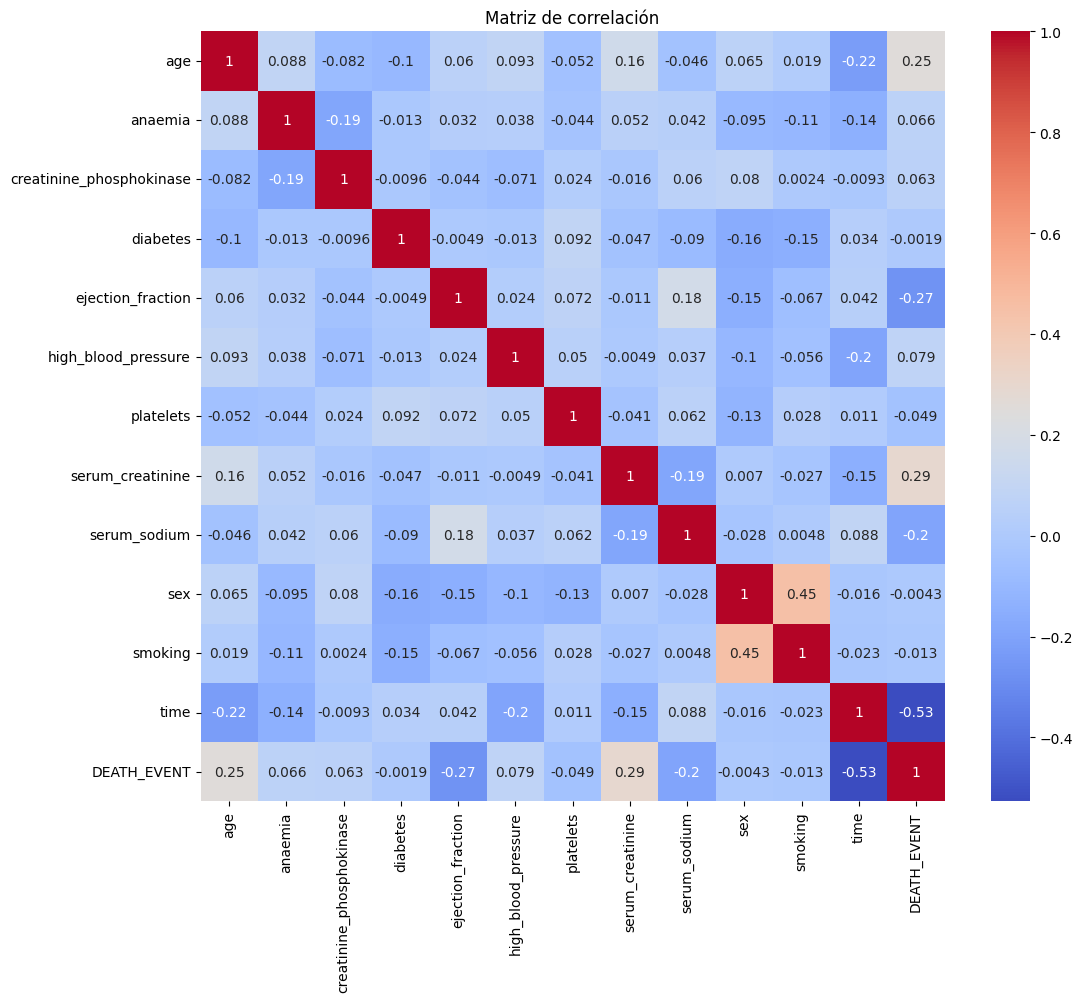

In [ ]:
#Gráfico de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Todas las variables tienen un nivel bajo de correlación, lo que permite establecer a priori que las variables son independiente. La variable a predecir (DEATH_EVENT) tiene una relación más pronunciada con el tiempo de seguimeinto (TIME).